### SetUp

In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from scipy.spatial.transform import Rotation

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## 차원 축소 (Dimensionality Reduction)

대부분 실무에서 분석하는 데이터는 `매우 많은 특성(feature)`들을 가지고 있다. 이러한 데이터를 가지고 머신러닝 알고리즘을 적용해 문제를 해결하려고 한다면, 데이터의 차원이 크기 때문에  학습 속도가 느릴 뿐만아니라 성능 또한 좋지않을 가능성이 크다. $\rightarrow$ `차원의 저주`

차원 축소는 훈련 속도를 높이는 것 외에도 데이터 시각화에도 아주 유용하다.

## 8.1 차원의 저주

머신러닝에서 데이터 셋의 특성(feature)가 많아지면, 각 특성인 하나의 차원(dimension) 또한 증가하게 된다.  
이렇게 데이터의 차원이 증가할 수록 데이터 공간의 부피가 기하 급수적으로 증가하기 때문에, 데이터의 밀도는 차원이 증가할 수록 희소(sparse)해진다.  
데이터의 차원이 증가할수록 데이터 포인트 간의 거리 또한 증가하게 되므로, 이러한 데이터를 이용해 머신러닝 알고리즘을 학습 하게되면 모델이 복잡해지게 된다. 따라서, `오버피팅(overfitting)` 위험이 커진다.  

이러한 차원의 저주를 해결하기 위한 방법 중 하나는 데이터의 밀도가 높아질 때까지 `학습 데이터셋의 크기를 늘리는 것`이다. 하지만, 데이터셋의 크기에 비해 차원은 기하급수적으로 커지기 때문에 매우 힘든 일이라 할 수 있다.

## 8.2 차원 축소를 위한 접근 방법

차원 축소에 사용되는 두 가지 주요 접근 방법 : `투영(projection)`과 `매니폴드 학습(manifold learning)`

### 8.2.1 투영

n차원 데이터셋을 차원이 낮은 d차원 데이터셋으로 투영(projection)하는 기법이다.  

3차원 데이터셋을 2차원 평면으로 투영한 결과  
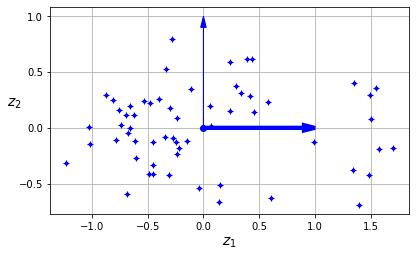

경우에 따라 보다 복잡한 데이터셋의 경우 샘플 구분이 보다 어렵다.  
예시는 스위스 롤 데이터셋으로 롤케익 모양을 생각하면 됨  
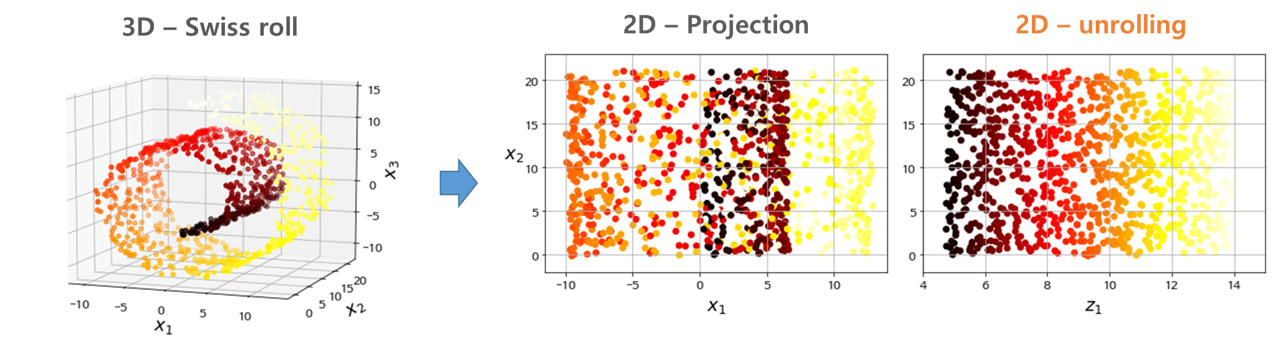

### 8.2.2 매니폴드 학습(Manifold Learning)  

고차원 공간에서 저차원 공간을 접거나 비틀어서 생성할 수 있는 공간을 `다양체(manifold)`라 부른다.  
예를 들어, 스위스 롤은 2차원 평면을 돌돌 말아 만든 3차원 공간상에 존재하는 2D 다양체다. 실제로 롤케이크을 조심해서 펴면 보다 적절한 2차원 데이터셋으로 변환된다.  
롤케이크와 같은 다양체의 경우 사영 보다는 접히거나 비틀어진 것을 잘 펼치면 보다 단순한 구조를 갖는 저차원의 데이터셋으로 변환된다. 이런 방식으로 숨겨진 저차원의 다양체를 찾는 과정이 `다양체 학습(Manifold learning)`이다.
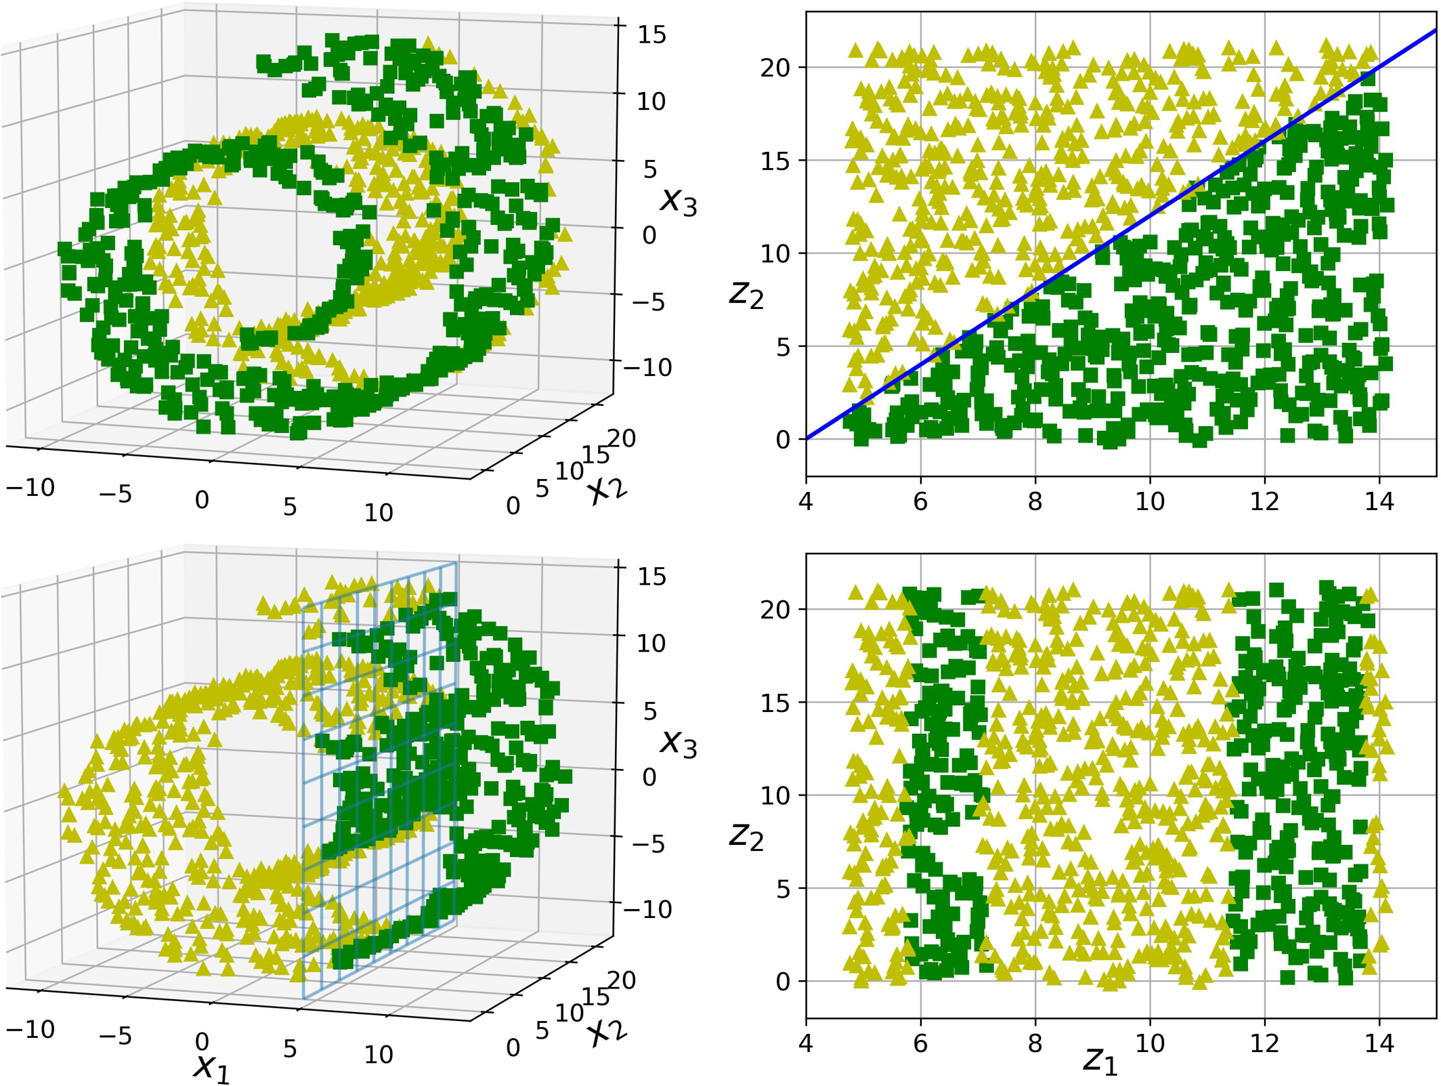

모델을 학습시키기 전에 학습 데이터셋의 차원을 감소시키면 학습 속도는 빨라지지만 모델의 성능은 항상 더 낫거나 간단한 모델이 되는 것은 아니다.  
이것은 데이터셋이 어떠한 모양을 하고 있느냐에 따라 달라진다.

## 8.3 PCA(주성분 분석)

가장 대표적인 차원 축소 알고리즘으로,  
`PCA`는 먼저 데이터에 가장 가까운 `초평면(hyperplane)`을 구한 다음, 데이터를 이 초평면에 `투영(projection)`시킨다.

### 8.3.1 분산 보존

저차원의 초평면에 데이터를 투영하기 전에 먼저 적절한 초평면을 선택해야 한다.  
PCA는 데이터의 분산이 최대가 되는 축을 찾는다. 즉, 원본 데이터셋과 투영된 데이터셋 간의 **평균제곱거리**를 **최소화** 하는 축을 찾는다.  
아래의 그림에서 왼쪽 2차원 데이터셋을 오른쪽 그림처럼 투영했을 때 $C_1$축으로 투영한 데이터가 분산이 최대로 보존되는 것을 확인할 수 있다.  
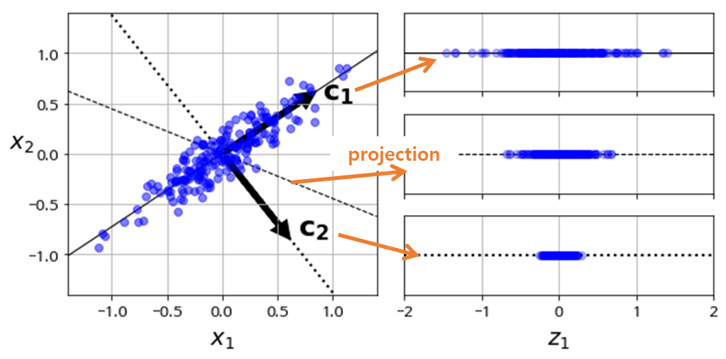

### 주성분

### 8.3.2 주성분

PCA는 다음과 같은 단계로 이루어진다. 

1. 학습 데이터셋에서 **분산이 최대인 축(axis)** 을 찾는다. 
2. 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.
3. 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.
4. `1~3`과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.

이렇게 $i$-번째 축을 정의하는 **단위 벡터**(unit vector)를 $i$-번째 **주성분**(PC, Principal Component)이라고 한다.

예를들어, 위의 그림에서는 2차원 데이터셋이므로 PCA는 분산을 최대로 보존하는 단위벡터 $c_1$이 구성하는 축과 이 축에 직교하는 $c_2$가 구성하는 축을 찾게 된다. 

데이터셋의 주성분은 선형대수의 특잇값 분해(SVD) 기법을 이용하여 수학적으로 쉽게 찾을 수 있으며, 찾아진 초평면으로의 투영 또한 쉽게 계산된다. 단, 데이터셋이 크거나 특성이 많으면 계산이 매우 오래 걸릴 수 있다.

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

print('X.shape:', X.shape)

X.shape: (60, 3)


In [3]:
import pandas as pd

df = pd.DataFrame(X, columns=['$X_1$', '$X_2$', '$X_3$'])
df.head(10)

,$X_1$,$X_2$,$X_3$
0,-1.015700,-0.550913,-0.261326
1,-0.007717,0.599586,0.035078
2,-0.953171,-0.464537,-0.249203
3,-0.920123,0.210096,0.021824
4,-0.763097,0.158261,0.191525
5,1.118161,0.325087,0.317106
6,-1.022589,-0.643841,-0.133687
7,0.673520,-0.273425,-0.007878
8,1.016196,0.515466,0.467833
9,0.549577,0.677280,0.234016


####  SVD를 이용한 PCA 구하기

SVD는 공분산 행렬 `X_cen`의 singular value와 singular vector를 계산한다.  
`np.linalg.svd`를 이용하여 SVD를 구할 수 있다.

$$
\mathbf{X} = \mathbf{U} \Sigma \mathbf{V}^{T}
$$

- $\mathbf{U}$ : $m \times m$ 직교행렬 → $\mathbf{X} \mathbf{X}^{T}$의 eigenvector, $\mathbf{X}$의 **left singular vector**
- $\mathbf{V}$ : $n \times n$ 직교행렬 → $\mathbf{X}^{T} \mathbf{X}$의 eigenvector, $\mathbf{X}$의 **right singular vector**라 하며, PCA의 주성분행렬
- $\Sigma$ : $m \times n$ 대각행렬 → $\mathbf{X} \mathbf{X}^{T}$ 또는 $\mathbf{X}^{T} \mathbf{X}$의 **eigenvalue의 제곱근**을 대각원소로 하는 행렬

In [4]:
X_cen = X - X.mean(axis=0) # 평균을 0으로

U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [5]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


### 8.3.3 d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 `d개의 주성분`으로 정의한 초평면에 투영하여 데이터셋의 차원을 `d차원`으로 축소시킬 수 있다.  

초평면에 훈련 세트를 투영하고 d차원으로 축소된 데이터셋 $X^{d-proj}$를 얻기 위해서는 아래 식과 같이 행렬 X와 V의 첫 d열로 구성된 행렬 $W_d$를 행렬 곱셈하면 된다.

$$
X_{d-proj} = XW_d
$$

In [6]:
W2 = V_t.T[:,:2]
X2D = X_cen.dot(W2)

X2D

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049],
       [ 1.10436914, -0.20204953],
       [-1.27265808, -0.46781247],
       [ 0.44933007, -0.67736663],
       [ 1.09356195,  0.04467792],
       [ 0.66177325,  0.28651264],
       [-1.04466138,  0.11244353],
       [ 1.05932502, -0.31189109],
       [-1.13761426, -0.14576655],
       [-1.16044117, -0.36481599],
       [ 1.00167625, -0.39422008],
       [-0.2750406 ,  0.34391089],
       [ 0.45624787, -0.69707573],
       [ 0.79706574,  0.26870969],
       [ 0.66924929, -0.65520024],
       [-1.30679728, -0.37671343],
       [ 0.6626586 ,  0.32706423],
       [-1.25387588, -0.56043928],
       [-1.04046987,  0.08727672],
       [-1.26047729, -0.1571074 ],
       [ 1.09786649, -0.38643428],
       [ 0.7130973 , -0.64941523],
       [-0.17786909,  0.43609071],
       [ 1.02975735, -0.33747452],
       [-0.94552283,

### 8.3.4 사이킷런 사용하기

Scikit-Learn은 편차 또한 자동으로 처리해 계산해준다. 아래의 코드에서 `singular vector`, 즉 주성분 행렬을 보면 위의 결과와 부호(`-`)가 다른것을 확인할 수 있다. 이는 벡터의 방향만 반대일 뿐 주성분 벡터가 구성하는 축은 동일하다.

#### Scikit-Learn을 이용한 PCA 구하기

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [8]:
print('singular value :', pca.singular_values_)
print('singular vector :\n', pca.components_.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[-0.93636116  0.34027485 -0.08626012]
 [-0.29854881 -0.90119108 -0.31420255]
 [-0.18465208 -0.2684542   0.94542898]]


In [9]:
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


### 8.3.5 설명된 분산의 비율

explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율

In [10]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839, 0.01119554])

이 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다.  
위의 3D 데이터셋의 처음 두 주성분에 대한 설명된 분산의 비율로,  
이는 데이터셋 분산의 `84.2%`가 첫 번째 PC를 따라 놓여 있고, `14.6%`가 두 번째 PC를 따라 놓여 있음을 알려준다.  
(세 번째 PC에는 `1.2%` 미만이 남아 있을 것이므로 아주 작은 양의 정보가 들어 있다고 생각해도 된다.)

따라서, 첫 번째 주성분과 두 번째 주성분을 이용해 3차원의 데이터셋 `X`를 2차원으로 투영할 경우, 원래 데이터셋의 분산에서 약`1.2%`를 잃게 된다.

### 8.3.6 적절한 차원 수 선택하기

축소할 차원 수를 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다.  
물론 시각화를 위해 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적이다.  

다음 코드는 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산한다.

In [11]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 2


그 후 `n_components = d` 로 설정하여 PCA를 다시 실행한다.  
하지만 유지하려는 주성분의 수를 지정하기보다는 보존하려는 분산의 비율을 `n_components`에 `0 ~ 1` 사이로 설정하는 것이 훨씬 낫다.

In [12]:
pca = PCA(n_components=0.95)
X_proj = pca.fit_transform(X)

print('principal component vec :\n', pca.components_.T)

principal component vec :
 [[-0.93636116  0.34027485]
 [-0.29854881 -0.90119108]
 [-0.18465208 -0.2684542 ]]


또 다른 방법은 설명된 분산을 차원 수에 대한 함수로 그리는 것이다.(cumsum을 그래프로 그리면 된다.)  
일반적으로 이 그래프에는 설명된 분산의 빠른 성장이 멈추는 변곡점이 있다.  

In [13]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [14]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print('선택할 차원 수 :', d)

선택할 차원 수 : 154


여기서는 차원을 약 100으로 축소해도 설명된 분산을 크게 손해 보지 않을 것이다.  

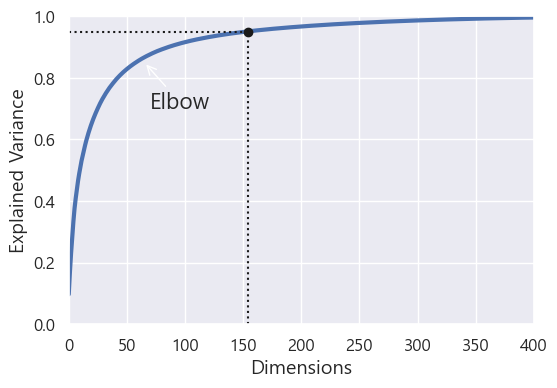

In [16]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

### 8.3.7 압축을 위한 PCA

데이터셋의 차원을 축소하게 되면 데이터셋의 크기가 줄어든다.  
다음의 예제는 MNIST 데이터셋에 분산의 `95%`만 유지하도록 PCA를 적용한 것이다. 
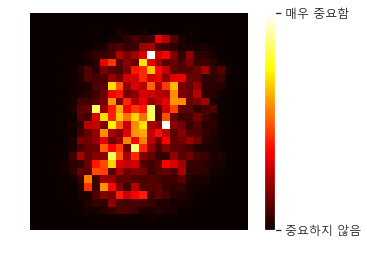

In [17]:
from tensorflow.keras.datasets import mnist

# MNIST load
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# reshape
train_x = train_x.reshape(-1, 28*28) 

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_x)  # PCA 계산 후 투영

In [18]:
print('선택한 차원(픽셀) 수 :', pca.n_components_)

선택한 차원(픽셀) 수 : 154


PCA 적용결과 총 784 차원에서 154로 80%정도 차원이 축소된 것을 알 수 있다.  
이러한 압축한 데이터셋을 이용해 SVM과 같은 분류알고리즘을 학습 시킬 경우 학습 속도를 빠르게 할 수 있다.  

또한, 압축된 데이터셋에 PCA 투영 변환을 반대로 적용하여 다시 원 데이터의 차원(mnist 경우 784)로 복원할 수 있다. 위에서 `5%` 만큼의 정보(분산)을 잃었기 때문에 완벽하게 복원은 할 수 없지만, 원본 데이터와 비슷하게 복원할 수 있다. 이러한 원본 데이터와 복원한 데이터간의 평균 제곱 거리를 **재구성 오차**(reconstruction error)라고 한다. 압축 후 복원하는 과정을 식으로 나타내면 다음과 같다.

$$
\mathbf{X}_{\text{recovered}} = \mathbf{X}_{d \text{-proj}} \mathbf{V}_{d}^{T}
$$

- $\mathbf{X}_{d \text{-proj}} = \mathbf{X} \mathbf{V}_{d}$
- $\mathbf{V}_{d}$ = orthogonal matrix → $\mathbf{V}_{d}\mathbf{V}_{d}^{T} = \mathbf{I}$

아래의 예제는 위의 예제에서 압축한 `X_reduced`에다가 `PCA`의 `inverse_transform()`메소드를 이용해 784차원으로 복원한 코드이다. 

In [19]:
X_recovered = pca.inverse_transform(X_reduced)

In [20]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

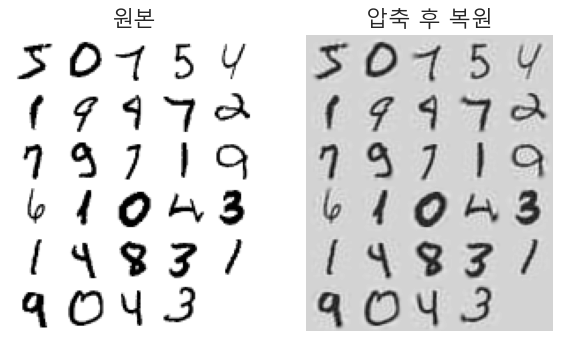

In [21]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.title("원본", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("압축 후 복원", fontsize=16)
plot_digits(X_recovered[::2100])

### 8.3.8 랜덤 PCA (Randomized PCA)

`svd_solver` 매개변수를 `'randomized'`로 지정하면 사이킷런은 `랜덤 PCA`라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다.  
d가 n보다 작을 경우 완전 SVD 방식보다 빠르다.  

In [22]:
rnd_pca = PCA(n_components = 154, svd_solver = 'randomized')
X_reduced = rnd_pca.fit_transform(X_train)

In [23]:
X_reduced.shape

(52500, 154)

svd_solver의 기본값은 'auto'이다.  
m이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA 알고리즘을 사용한다.

### 8.3.9 점진적 PCA (Incremental PCA - IPCA)

PCA의 단점은 SVD(scikit-learn에서)를 수행하기 위해서는 전체 학습 데이터셋을 메모리에 올려야 한다는 것이다. 이러한 단점을 보완하기 위해 **Incremental PCA(IPCA)** 알고리즘이 개발되었다. 

IPCA는 학습 데이터셋을 미니배치로 나눈 뒤 IPCA 알고리즘에 하나의 미니배치를 입력으로 넣어준다. IPCA는 학습 데이터셋이 클때 유용하다.

아래의 예제는 MNIST 데이터를 100개의 미니배치로 나눠 PCA를 수행하는 코드이다.  
전체 훈련 세트를 사용하는 fit() 메서드가 아니라 partial_fit() 메서드를 미니배치마다 호출해야 한다.

In [24]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for batch_x in np.array_split(train_x, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(batch_x)

X_reduced = inc_pca.transform(train_x)

....................................................................................................

In [25]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

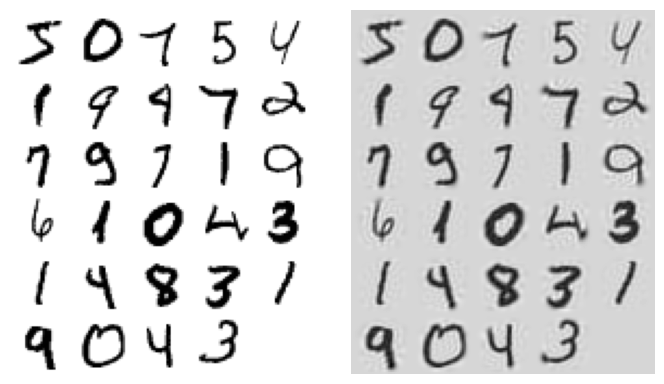

In [26]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(train_x[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

## 8.4 커널 PCA (Kernel PCA)

`SVM`에서 커널을 이용해 데이터를 저차원에서 고차원으로 매핑시켜 비선형 데이터셋에 SVM을 적용시키는 `Kernel SVM`에 대해 알아보았다. 

이렇게 같은 기법을 PCA에 적용해 비선형 투영으로 차원을 축소할 수 있는데, 이것을 **Kernel PCA**(KPCA)라고 한다.

In [27]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [28]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

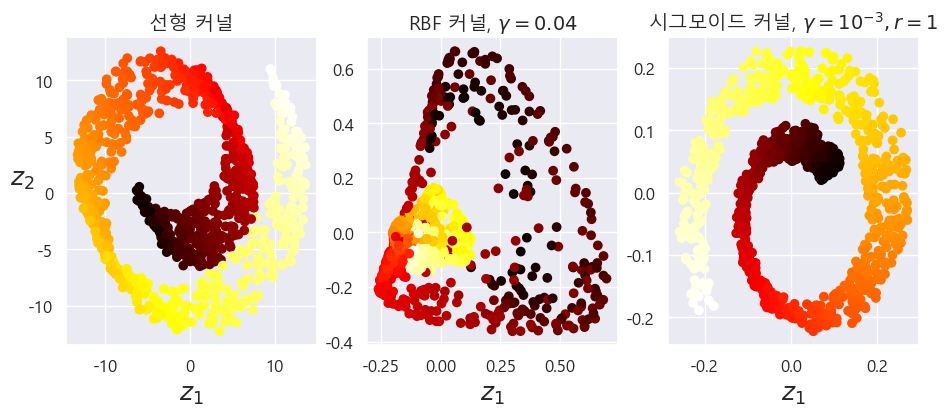

In [29]:
lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "선형 커널"), (132, rbf_pca, "RBF 커널, $\gamma=0.04$"), (133, sig_pca, "시그모이드 커널, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

- (단순히 PCA를 사용한 것과 동일한) 선형 커널, RBF 커널, 시그모이드 커널을 사용하여 2차원으로 축소시킨 스위스 롤의 모습

### 8.4.1 커널 선택과 하이퍼파라미터 튜닝

`KPCA`는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다. 하지만 차원 축소는 종종 분류와 같은 지도 학습의 전처리 단계로 활용되므로 `그리드 탐색`을 사용하여 주어진 문제에서 성능이 가장 좋은 커널과 하이퍼파라미터를 선택할 수 있다.  
다음 코드는 두 단계의 파이프라인을 만든다.  
먼저 `KPCA`를 사용해 차원을 2차원으로 축소하고 분류를 위해 `로지스틱 회귀`적용하고,  마지막 단계에서 가장 높은 분류 정확도를 얻기 위해 `GridSearchCV()`를 사용해 KPCA의 `가장 좋은 커널`과 `gamma 파라미터`를 찾는다.

`비선형적 데이터`에서 유용한 정보를 추출할 수 있도록 기존 데이터를 고차원 간으로 매핑하는데 커널 트릭을 사용한다. 커널 트릭은 데이터 간의 유사도를 계산할 수 있는 함수를 사용하여 데이터를 고차원 공간으로 변환한다.

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [31]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [32]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766146

--- 어렵다 이해 부족 ---

## 8.5 LLE (지역 선형 임베딩)

`LLE(지역 선형 임베딩)`은 또 다른 강력한 `(NLDR)비선형 차원 축소`기법으로 이전 알고리즘처럼 투영에 의존하지 않는 매니폴드 학습이다.  
먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나  선형적으로 연관되어 있는지 측정하고,  
국부적인 관계가 가장 잘 보존되는 훈련 세트의 저차원 표현을 찾는다.  
이 방법은 특히 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는데 잘 작동한다.  


In [34]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [35]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
lle.fit(X)

LocallyLinearEmbedding(n_neighbors=10, random_state=42)

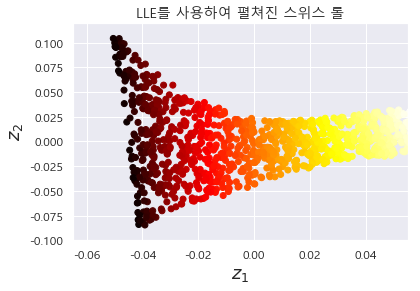

## 8.6 다른 차원 축소 기법

위에서 살펴본 PCA, LLE 차원 축소 알고리즘 외에 다양한 차원 축소 알고리즘들이 있다.

- **Random Projection**(랜던투영) : 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영하여 실제로 거리를 잘 보존한다. 차원 축소 품질은 샘플 수와 목표 차원 수에 따라 다르다. (초기 차원수에는 의존적이지 않다.)
- **MDS**(Multi-Dimensional Scaling): MDS는 데이터 포인트 간의 거리를 보존하면서 차원을 축소하는 기법이다. 
- **Isomap**: Isomap은 각 데이터 포인트를 가장 가까운 이웃과 연결하는 식의 그래프를 만든 후 그래프에서 두 노드 사이의 최단 경로를 이루는 노드의 수인  **geodesic distance**(지오데식 거리)를 유지 하면서 차원을 축소한다.
- **t-SNE**(t-distributed Stochastic Neighbor Embedding): t-SNE는 비슷한 데이터는 가까이, 비슷하지 않은 데이터는 멀리 떨어지도록 차원을 축소한다. 주로 시각화에 많이 사용되며, 특히 고차원 공간에 있는 데이터의 군집을 시각화할 때 사용한다.
- **LDA**: LDA는  Supervised learning이며, 분류 알고리즘에 속한다. LDA는 학습 단계에서 클래스를 가장 잘 구분하는 축을 학습하며, 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용할 수 있다. 이러한 초평면으로 데이터를 투영하게 되면 클래스 간의 거리를 멀리 떨어지게 축소할 수 있다.

In [36]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [37]:
from sklearn.manifold import MDS, Isomap, TSNE

# MDS
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

# Isomap
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

C:\Users\junyoung\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


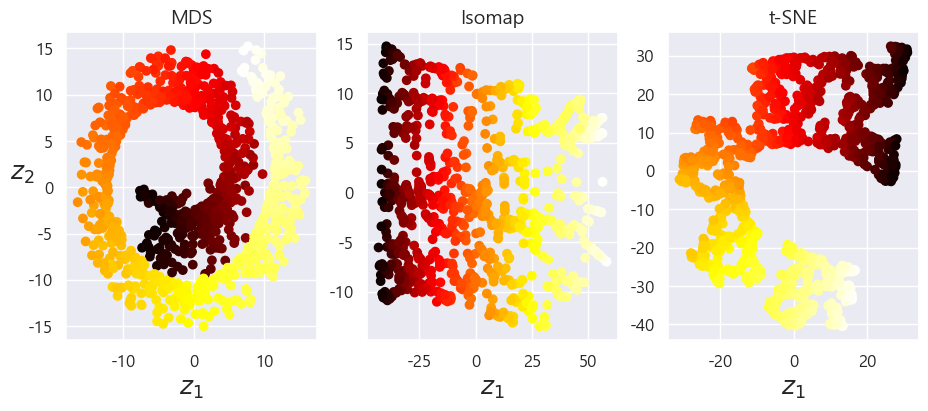

In [38]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()